# Assignment 4

**Submission deadlines:**
- get at least 4 points by Tuesday, 11.05.2021
- remaining points: last lab session before or on Tuesday, 18.05.2021

**Points:** Aim to get 12 out of 15+ possible points


## Submission instructions
The class is held remotely. To submit your solutions please show the notebook over the video call. Make sure you know all the questions and answers, and that the notebook contains results (before presentation do `Runtime -> Restart and run all`)

We provide starter code, however, you are not required to use it as long as you properly solve the tasks.

As always, please submit corrections using GitHub's Pull Requests to https://github.com/janchorowski/dl_uwr.

# Problem 1: Word Embeddings [4p]

Many natural language processing tasks requrie continuous representations for words.
[Word embeddings](https://en.wikipedia.org/wiki/Word_embedding) are mappings from a discrete
space to real-valued vectors. Word embeddings might be trained with neural networks,
either as a by-product of other tasks (e.g., language modeling, neural machine translation),
or with networks designed specifically for the word embedding task.

Two problems associated with training neural word embeddings are related to the speed of training:
(a) large volume of data, on which the network has to be trained on, and (b) time required to compute
output probability distribution over large vocabularities.

One of the most popular architectures for training word embeddings is called Word2vec [[1]()], [[2]()]. It builds on the idea that semantics of a word can be defined through the contexts,
in which the word appears in the sentence.

Let $w_1, w_2,\ldots,w_N$ be an $N$-word sentence in a natural language.
We define a context of a word $w_l$ a list of $n$ preceeding and following words
$w_{l-n},\ldots,w_{l-1},w_{l+1},\dots,w_{l+n}$.

The underlying assumption is that similar words appear in similar contexts.
For instance, words *Poland* and *Monaco* are similar in a sense, that they are singular nouns
describing abstract concepts of existing, european countries.
We can convince ourselves by looking at exceprts from Wikipedia articles
on Poland and Monaco:

* Despite **Monaco's independence** and separate foreign policy
* aimed to preserve **Poland's independence** and the szlachta's

* **Monaco joined the** Council of Europe in 2004
* **Poland joined the** Schengen Area in 2007

* nearly one-fifth **of Poland's population** – half of them
* Christians comprise a total of 83.2% **of Monaco's population**.

### Tasks
You will use word vectors pre-computed on a large dataset.
1. **[1p]** It has been observed, that word embeddings allow to perform semantic arithmetic where, for instance

    **king** - **man** + **woman** ~= **queen**

    This *analogy* task is often used as a quality measure of word embeddings. Load word embeddings and compute
    their analogy score on a dataset of analogous pairs, expressed as an accuracy of accuracy of predicting a pair
    item (**queen** in the example above). Specifically, compare `FastText` and `Word2vec` word embeddings.
    
2. **[1p]** Word embedding capture approximate semantics. Under an assumption that words of similar semantics
    exist in different languages, a mapping $W: \mathbb{R}^{300}\mapsto\mathbb{R}^{300}$ might be constructed that
    translates word embeddings between languages. It has been shown that such ortonormal mappings allow to express
    approximate, bilingual dictionaries. In addition, non-linear mappings do not offer additional benefits.

    Given a simple English-Polish dictionary of word pairs (sourced from Wikitionary)
    find an orthonormal mapping $W$ between English and Polish `FastText`
    word embeddings using Procrustes analysis.

3. **[1p]** Word embeddings can often be nicely visualized.
    Make a 2-D `PCA` plot of word embeddings for countries and their capital cities
    for `FastText` or `Word2vec`. Connect each country with its capital city with a line segment.
    Can you see any regularities?
    
4. **[1p]** Plot 400 roughly most frequent words' embeddings (either `FastText` or `Word2vec`) in 2-D with `PCA`.
    Skip stop words, punctuations, artifact words, etc. You can be imprecise and use heuristics
    (e.g., select words than are at lest 3 charactes long).
    Can you see any regularities? Another method of making meaningful visualizations is `t-SNE`.
    
    Make another 2-D visualization, this time using `t-SNE`. Visualizations with `t-SNE` are obtained
    with gradient descent. Try to tweak optimization parameters to get lower optimization error,
    than the one with default parameters.
    Can you see any regularities this time?

# Problem 2: kNN Talker [11p+]

In this exercise you will build a simple chatbot that uses distributed representations of words and sentences to perform a nearest neighbor selection of responses.

We have collected two sets of data:
- `./reddit_pairs.txt` of excerpts of [Reddit](https://www.reddit.com/) conversations,
- `./hackernews_pairs.txt` of excertps from [Hackernews](https://news.ycombinator.com/).

The two corpuses are formatted as `tab`-separated pairs of utterances: a `prompt` and a `response`. Successive lines belong to different conversations.

The main idea of the chatbot is to build a representation of the user `input` and of all `prompts` from the corpus. Then select the best (or randomly one of the top few) matches and print the associated `response`.

The key to get the bot working is to create good sentence representations. We will try:
- averaging word embeddings
- using sentence models such as BERT.

### Warning:
The Reddit corpus may contain abusive language, it was not heavily cleaned.

### Tasks
The code below is a starting point, but you can develop you own. The following list suggests some actions to try, along with the points that reflect our subjective hardness. The exercise is worth 6 regular points (i.e. the report, word embedding-based model and BERT-based model), anything on top of it will be counted as a bonus.

1. [2p] Type in a Markdown cell a report of your actions, what did you try, why, what was the result. Show exemplary conversations (they must be probable under your model). Cherry-pick 3 nice dialogues.
2. [2p] Represent sentences by averaging their word vectors. Properly handle tokenization (you can use regular expressions or e.g. `nltk` library). Describe how you handle lower and upper cased words. Try a few nearest neighbor selection methods (such as euclidean or cosine distance). See how embedding normalization affects the results (you can normalize individual word vectors, full sentence vectors etc.).
3. [2p] Use the [transformers](https://huggingface.co/transformers) package to load a pretrained BERT model. Use it to represent sentences by e.g. averaging the activations in the last layer.
4. [1p] Incoportate context: keep a running average of past conversation turns.
5. [1p] Do data cleaning (including profanieties), finding rules for good responses.
6. [1p] Try mixing different sentence representation techniques.
7. [2p] Try to cluster responses to the highest scored prompts. Which responses are more funny: from the largerst or from the smallest clusters?.
8. [1p+] Implement your own enhancements.


# Starter code

In [ ]:
# Please note that this code needs only to be run in a fresh runtime.
# However, it can be rerun afterwards too.

# Download word vectors
!pip install -q gdown httpimport
![ -e word2vec.tar.xz ] || gdown 'https://drive.google.com/uc?id=1v6D8IjYVFlonhQuN_J3PML5KSVQSpbED' -O word2vec.tar.xz
![ -d word2vec ] || tar Jxf word2vec.tar.xz

Downloading...
From: https://drive.google.com/uc?id=1v6D8IjYVFlonhQuN_J3PML5KSVQSpbED
To: /content/word2vec.tar.xz
395MB [00:03, 101MB/s]


In [ ]:
# Download conversation corpuses
![ -e  hackernews_pairs.txt ] || gdown 'https://drive.google.com/uc?id=10cp2maNp1suzc5BaFQwDJr2GTKXHQOz_' -O hackernews_pairs.txt
![ -e  reddit_pairs.txt ] || gdown 'https://drive.google.com/uc?id=1Uf0Xl9aqQVBBpOwhYTV7iWCwj95FDqtL' -O reddit_pairs.txt

Downloading...
From: https://drive.google.com/uc?id=10cp2maNp1suzc5BaFQwDJr2GTKXHQOz_
To: /content/hackernews_pairs.txt
4.39MB [00:00, 43.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Uf0Xl9aqQVBBpOwhYTV7iWCwj95FDqtL
To: /content/reddit_pairs.txt
3.89MB [00:00, 126MB/s]


In [ ]:
# Huggingface Transformers implementation
!pip install -q tqdm boto3 requests regex sentencepiece sacremoses
!pip install -q transformers
!pip install profanity-check

     |████████████████████████████████| 102kB 7.6MB/s 
     |████████████████████████████████| 1.2MB 27.3MB/s 
     |████████████████████████████████| 901kB 54.9MB/s 
     |████████████████████████████████| 7.5MB 65.5MB/s 
     |████████████████████████████████| 81kB 10.5MB/s 
ERROR: botocore 1.20.74 has requirement urllib3<1.27,>=1.25.4, but you'll have urllib3 1.24.3 which is incompatible.
     |████████████████████████████████| 2.3MB 13.2MB/s 
     |████████████████████████████████| 3.3MB 56.4MB/s 
     |████████████████████████████████| 2.4MB 15.0MB/s 


In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import collections

import codecs

import numpy as np
from scipy.linalg import orthogonal_procrustes
from scipy.spatial import distance

import nltk
import sklearn
nltk.download('punkt')

import pprint
import gensim

import io
from tqdm.autonotebook import tqdm


import torch


import tabulate

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [ ]:
# Word embeddings assign a vector to each word. To use them we need three things:
# 1. the embeddings themselves
# 2. a dictionary from words to their embedding ids
# 3. an inverse dictionary

Embedding = collections.namedtuple(
    'Embedding',
    ['vec', 'word2idx', 'idx2word'])

In [ ]:
def load_vecs_npy(base_path):
    """Load small embeddings in .npy format."""
    vec = np.load(base_path + '.npy')
    idx2word = [l.strip() for l in codecs.open(
                      base_path + '.txt', 'r', 'utf-8')]
    word2idx = {w:i for (i,w) in enumerate(idx2word)}
    return Embedding(vec, word2idx, idx2word)

In [ ]:
# Load top 200k word embeddings: Word2vec and FastText
word2vec = load_vecs_npy('word2vec/word2vec_GoogleNews_200k')
ftext = load_vecs_npy('word2vec/fasttext_wikien_200k')

## 1.1: Analogies

In [ ]:
def load_analogies():
    '''Load tuples of analogies, e.g., (man, woman, king, queen)'''
    questions_path = 'word2vec/questions-words.txt'
    analogies = [l.strip().split() for l in open(questions_path, 'r') \
                 if not l.startswith(':')]
    return analogies

In [ ]:
def eval_analogies(vecs, analogies):
    """
    Compute the accuracy on the analogy task.
    
    In the task, quadruples of words are given (q1, q2, r1, r2).
    The words q1 and q2 are bound by a relation. The words r1 and r2 
    are bound by the same relation. The task is to predict r2 knowing words
    q1, q2, and r1.
    
    Example:
    Quadruple [King, Queen, Man, Woman] yields the question
    King is to Queen as Man is to ????
    
    Args:
        word_vecs: Embeddings tupes
        analogies: list of quadruples: (q1, q2, r1, r2)
        
    Returns:
        percentage of correct answers
    """
    indexes = [[vecs.word2idx.get(w, None) for w in tupl] \
                for tupl in analogies]
    indexes = [tupl for tupl in indexes \
               if all([v is not None for v in tupl])]
    # indexes holds quadruples of ints giving the ids of words from our vocab.
    indexes = np.asarray(indexes)
    print('Got vocab for %d/%d pairs' % (indexes.shape[0], len(analogies)))
    
    # Extract the vectors for the query words
    q1 = vecs.vec[indexes[:, 0]]
    q2 = vecs.vec[indexes[:, 1]]
    r1 = vecs.vec[indexes[:, 2]]

    print(q1.shape, q2.shape, r1.shape)
    
    # Extractr the word IDs for the correct answers
    r2_inds = indexes[:, 3]

    #
    # TODO 
    #
    # Compute the approximate location of word r2 as r2 = r1 + (q2 - q1)
    # Find the word closest to this location using cosine distance.
    # Return it's id and compute the accurracy.
    #

    r2_pred = r1 + (q2 - q1)
    # r2_pred = q1 - q2 + r1 # nani?
    
    
    # Normalize length and compute dot product between r2_pred and word_vecs
    # to get cosine distance
    r2_pred_norm = r2_pred / np.linalg.norm(r2_pred, axis=1)[:, np.newaxis]
    # vecs_norm = numpy.dot(vecs.vec, r2_pred_norm)
    # print(r2_pred.shape, vecs.vec.shape)
    vecs_norm = vecs.vec / np.linalg.norm(vecs.vec, axis=1)[:, np.newaxis]
    # print(r2_pred_norm.shape, vecs_norm.shape)

    # print(np.linalg.norm(r2_pred_norm, axis=1)[-50:])
    # print(np.linalg.norm(vecs_norm, axis=1)[-50:])
    # print((r2_pred_norm)[-50:])
    # print((vecs_norm)[-50:])
    # raise BaseException
    
    # Compute in chunks to save memory
    r2_pred_inds = np.concatenate([np.argmax(r2_pred_norm[i:i+1000].dot(vecs_norm.T), axis=1) \
                                   for i in range(0, r2_pred.shape[0], 1000)])
    return 100.0 * (r2_pred_inds == r2_inds).sum() / r2_inds.shape[0]

In [ ]:
# Load analogy tuples, e.g., (man, woman, king, queen)
analogies = load_analogies()

# Some are uppercased geographical names (and FastTexts are lowercased)
analogies_lower = [[w.lower() for w in tupl] for tupl in analogies]

print(analogies[0])
print(analogies_lower[0])

['Athens', 'Greece', 'Baghdad', 'Iraq']
['athens', 'greece', 'baghdad', 'iraq']


In [ ]:
# Keep in mind that the vocab is restricted to 200k most freq words
# (in the training corpus!)
print('FastText analogy task accuracy:')
print('-------------------------------')
# Fast-text was trained on lowercased text only
print(eval_analogies(ftext, analogies_lower), '% correct')

print('\nWord2vec analogy task accuracy:')
print('-------------------------------')
# Word2vec has case information
print(eval_analogies(word2vec, analogies), '% correct')

FastText analogy task accuracy:
-------------------------------
Got vocab for 19420/19544 pairs
(19420, 300) (19420, 300) (19420, 300)
16.374871266735326 % correct

Word2vec analogy task accuracy:
-------------------------------
Got vocab for 18783/19544 pairs
(18783, 300) (18783, 300) (18783, 300)
20.859287653729435 % correct


## 1.2: translation through alignment of vector spaces

In [ ]:
# We need Polish embeddings
ftext_pl = load_vecs_npy('word2vec/fasttext_wikipl_200k')

# Load a simple wikitionary-based dict of word pairs
en_pl = [l.strip().split('\t') for l in codecs.open(
    'word2vec/word2vec_en_pl', 'r', 'utf-8') if not '<UNK>' in l]
en_pl = {t[0]:t[1] for t in en_pl if len(t) == 2}

# Keep those, for which we have embeddings
en_pl = {en:pl for (en,pl) in en_pl.items() \
         if en in ftext.word2idx and pl in ftext_pl.word2idx}
print('Dictionary size:', len(en_pl))
print('good --', en_pl['good'])

Dictionary size: 750
good -- dobro


In [ ]:
# Select word embeddings for dictionary words
en_words = sorted(en_pl.keys())
V_en = ftext.vec[[ftext.word2idx[w] for w in en_words]]
V_pl = ftext_pl.vec[[ftext_pl.word2idx[en_pl[w]] for w in en_words]]
# print(V_en.shape, V_pl.shape)

(750, 300) (750, 300)


In [ ]:
# Find an orthogonal transformation from V_en to V_pl.
# which minimizes square reconstruction error
W = orthogonal_procrustes(V_en, V_pl)[0]

In [ ]:
def closest_words(embedding, embeddings: Embedding):
  """search for words closest to embedding in embeddings"""
  # for i, vector in enumerate(embeddings.vec):
  #   print(i, vector)
  vector_indices = [ (vector, i) for i, vector in (enumerate(embeddings.vec)) ] # (vector, word) tuples
  # print(vector_indices[-5:])
  # raise BaseException
  return sorted(
      [ (distance.cosine(vector, embedding), idx) for vector, idx in (vector_indices) ]
  )

In [ ]:
def translate(W, v, dest_vecs):
    #
    # TODO
    #
    # Transform source word vector v using W getting a location in target space.
    # Find the closest word in target space using the cosine distance.
    #
    src_vec = v
    dest_vec = np.matmul(v, W)
    _, idx = closest_words(dest_vec, dest_vecs)[0]
    
    return dest_vecs.idx2word[idx]

# Select random, fairly frequent words not from the dictionary
tr_words = [i for i in np.random.randint(1000, 2000, 100) \
            if ftext.idx2word[i] not in en_pl]
tr_words = tr_words[:20]

rows = [[ftext.idx2word[i], translate(W, ftext.vec[i], ftext_pl)] \
         for i in tqdm(tr_words)] 
print(tabulate.tabulate(rows))


------------  --------------
numerous      wiele
bring         wracać
whom          zaprzyjaźnili
·             rozmowa
basic         odpowiedni
kong          automatyczny
edward        piechaczek
sportspeople  ludzie
arms          włócznię
perhaps       pewno
represented   reprezentowany
nearby        sąsiedztwie
industrial    przemysłowy
temple        świątynia
themselves    szanują
leaves        zwisająca
genre         grunge
publications  publikacja
profile       speedsport
authority     władza
------------  --------------


## 1.3: PCA

In [ ]:
capitals = [l.strip().split('\t') for l in codecs.open('word2vec/countries_capitals', 'r', 'utf-8')]
capitals = {country:capital for (country,capital) in capitals}

# Select those present in Word2vec vocab
capitals = {k:v for (k,v) in capitals.items() \
            if k in word2vec.word2idx and v in word2vec.word2idx}

# Flatten the array to have a list of [country, capital, country, capital, ...]
geo = [e for pair in capitals.items() for e in pair]
print(len(geo) // 2, 'pairs', geo[:6])

131 pairs ['Afghanistan', 'Kabul', 'Albania', 'Tirana', 'Algeria', 'Algiers']


In [ ]:
geo_inds = [word2vec.word2idx[w] for w in geo]
geo_vecs = word2vec.vec[geo_inds]
print(geo_vecs.shape)

(262, 300)


In [ ]:
from sklearn.decomposition import PCA

#
# TODO
# use PCA from sklearn.decomposition to project the countries and capitals into 2D.
# draw lines connecting each country with its capital
#
# Hint:
# - the function "annotate" can be used to put text onto the plot
#

pca = PCA(n_components=2)
data = pca.fit_transform(geo_vecs).transpose()

x, y = data

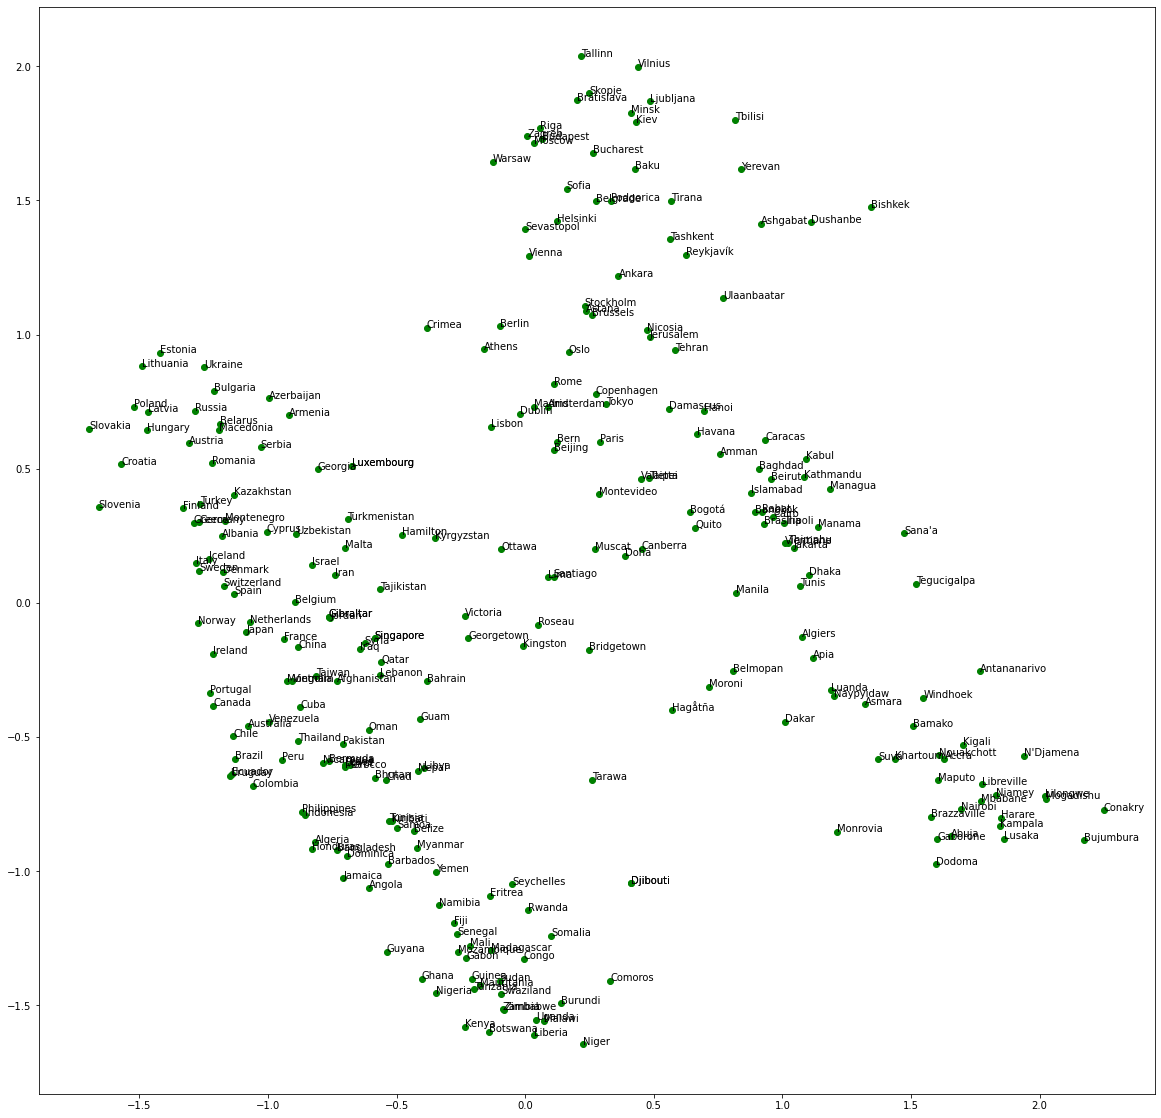

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(x, y, c='g')

for i, word in enumerate(geo):
  ax.annotate(word, (x[i], y[i]))

plt.show()

## 1.4: PCA vs t-SNE on frequent words

In [ ]:
# Select words starting from the 200th to ommit stop words,
# which have at least 3 chars
top_words = [w for (i,w) in enumerate(ftext.idx2word) \
             if i > 200 and len(w) >= 3][:400]
top_inds = [ftext.word2idx[w] for w in top_words]

top_vecs = [ftext.vec[i] for i in top_inds]

#
# TODO: make a 2D PCA projection of the selected words.
#

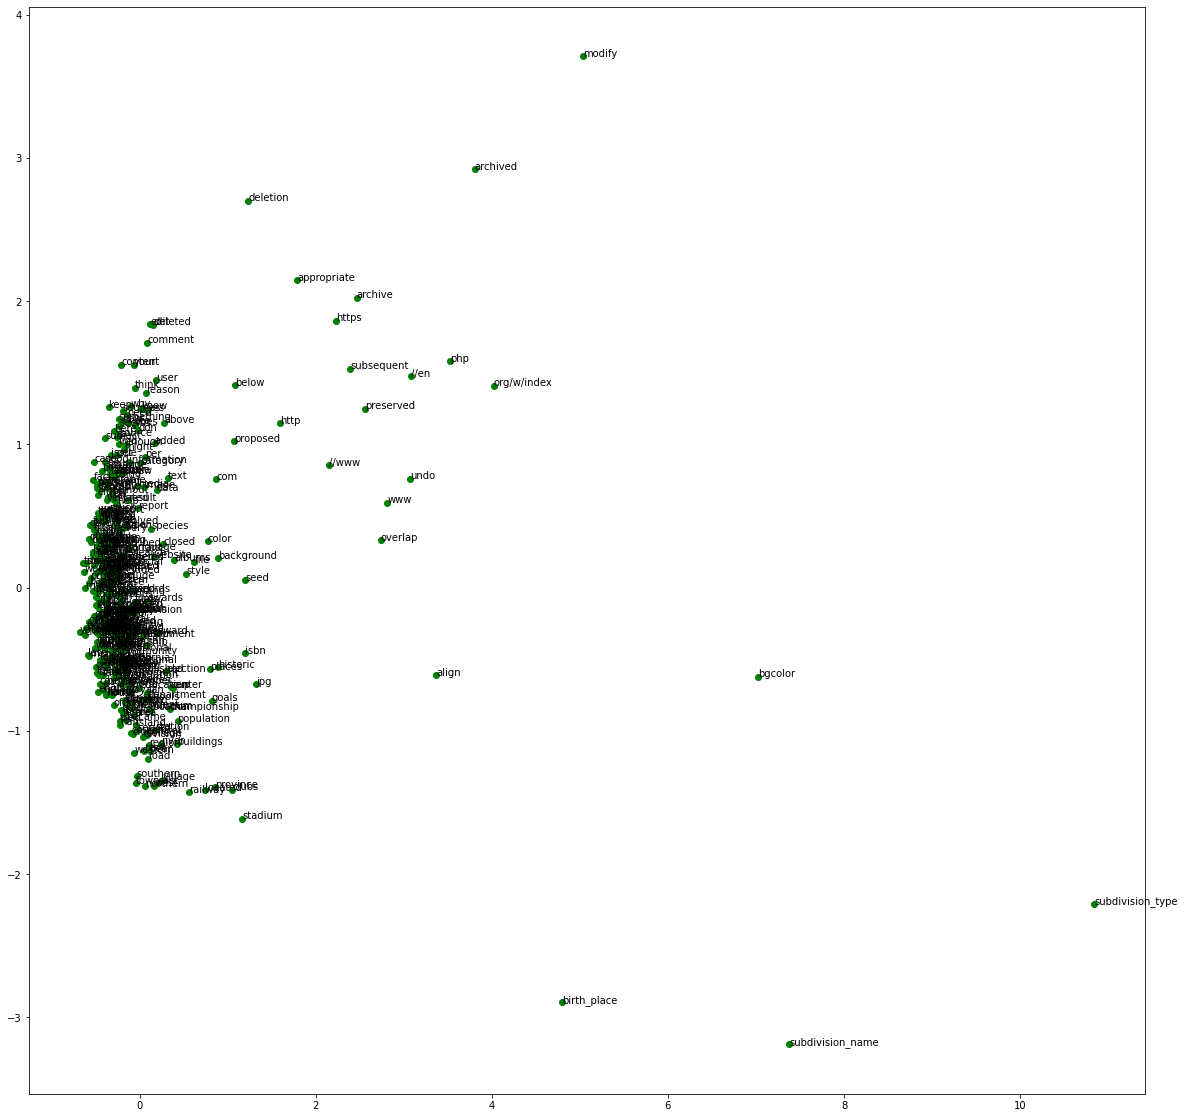

In [ ]:
pca = PCA(n_components=2)
data = pca.fit_transform(top_vecs).transpose()

x, y = data

fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(x, y, c='g')

for i, word in enumerate(top_words):
  ax.annotate(word, (x[i], y[i]))

plt.show()

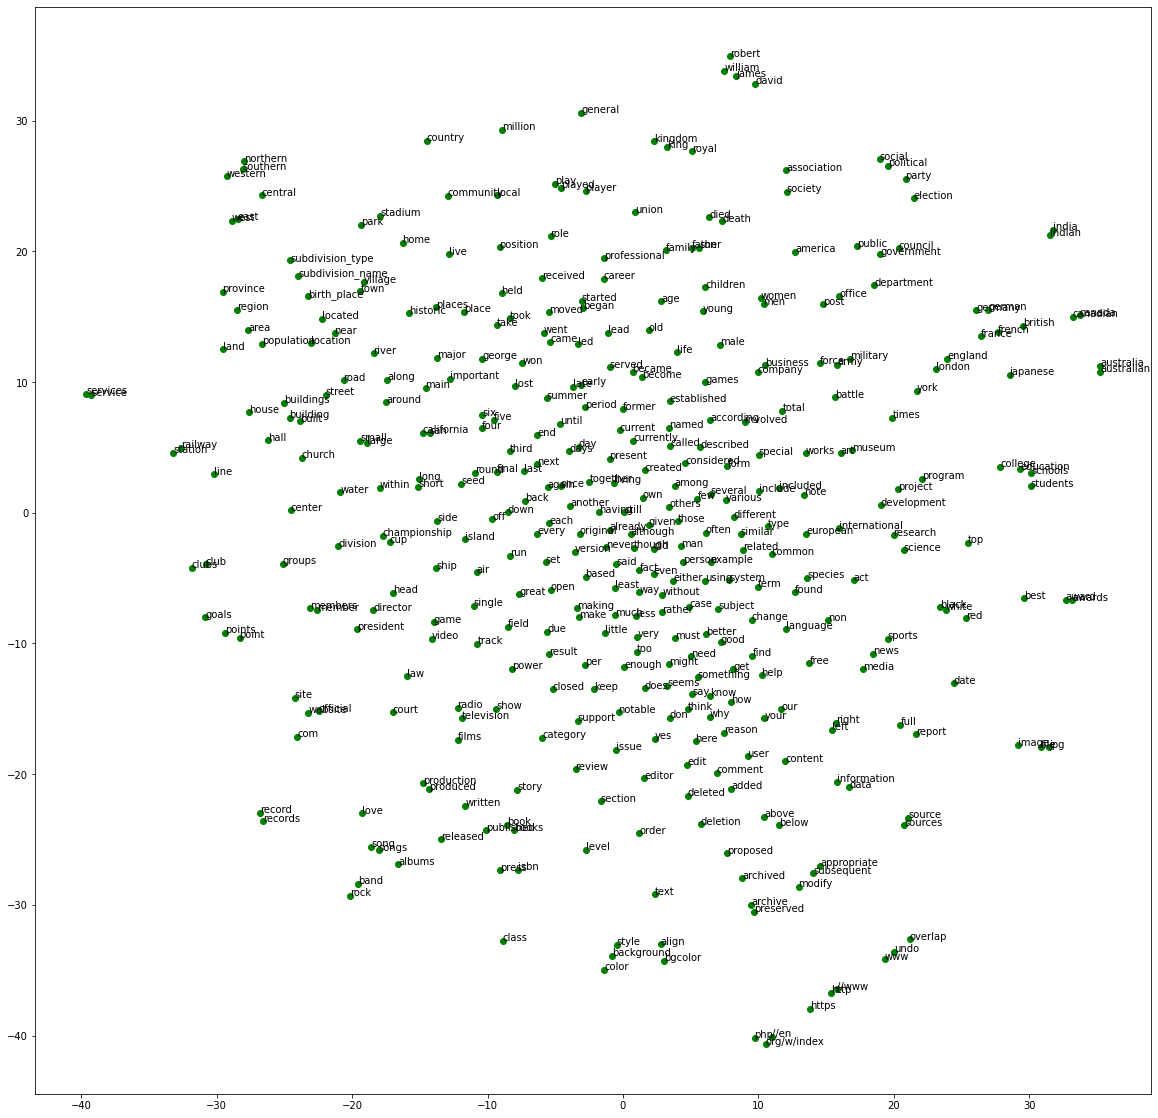

In [ ]:
from sklearn.manifold import TSNE

#
# TODO: make a 2D t-SNE projection of the selected words.
# Things will cluster much nicer
#
tsne = TSNE(n_components=2) # random_state=0?
Y = tsne.fit_transform(top_vecs)
xs, ys = Y[:, 0], Y[:, 1]

fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(xs, ys, c='g')

for i, word in enumerate(top_words):
  ax.annotate(word, (xs[i], ys[i]))

plt.show()

In [ ]:
# TODO: zomm in on 3 meaningful clusters
fig, ax = plt.subplots()

ax.scatter(xs, ys, c='g')

for i, word in enumerate(top_words):
  ax.annotate(word, (xs[i], ys[i]))

# plt.axis([10, 11, 10, 11])
# plt.
plt.xlim((10.0, 11.0))
plt.ylim(10.0, 11.0)
# fig.tight_layout()
plt.show()

## Problem 2 (pending)

### Some observations:

* [Schakel and Wilson](https://arxiv.org/abs/1508.02297), 2015 observed some interesting facts regarding the length of word vectors:
  > A word that is consistently used in a similar context will be represented by a longer vector than a word of the same frequency that is used in different contexts.

  > Not only the direction, but also the length of word vectors carries important information.

  > Word vector length furnishes, in combination with term frequency, a useful measure of word significance.
  
  Thus I do not think word vector normalisation is beneficial.
  
  When applying normalisation to word2vec non-meaningful words like "what", "do", "you" are promoted. This is not what we want. The words that do consistently appear in the same context are the ones that carry most information within a sentence.
  
  On the other hand sentence vector normalisation seems intuitively reasonable, because we don't care about sentence length.

  [Source](https://stats.stackexchange.com/a/218729)

  Certainly this does not apply to sentence vector embeddings created using some of word one-hot vector encodings.


* For any two normalised vectors their *squared* Euclidean distance (ie. squared L2 distance) is proportional to the cosine distance. Thus vector ranks if vectors are ranked by Euclidean/L2 or cosine distance to some given vector are the same (for normalised vectors).

* I tried one hot sentence encoding as suggested in the given template

* I tried word2vec sentence encoding by averaging word word2vec vectors

* I tried BERT pooler output (which is last hidden state for the CLS token and depends on all input tokens) for encoding sentences with BERT. This provided only so-so results and I switched to some concatenated last layers instead (details in implementation).

* All in all I was not satisfied, so I tried to use pretrained BERT for next sentence prediction from Hugging Face Transformers
  I could not use BERT for calculating how much all data set prompt-responses are probable given a user-inputed prompt, because it would take about too much time for each prompt in conversation.
  What I've done is to calculate similar likelihood for all prompt-response pairs in dataset during preprocessing phase. We can use this likelihoods to discriminate dataset's prompt-response pairs which are not correlated.

In [ ]:
from profanity_check import predict

def reject_line(prompt, response):
  prompt = ''.join(c for c in prompt if c not in "',.\"?$-()")
  split_prompt = prompt.split()
  prompt_word_count = len(split_prompt)
  if prompt_word_count < 4:
    return True
  prompt_non_alpha_words = [word.isalpha() for word in split_prompt].count(False)
  if 2 < prompt_non_alpha_words:
    return True
  return False

prompts = []
responses = []
err_lines = []
rude_lines = []
rejected_lines = []
with open('./hackernews_pairs.txt') as f:
    for line in tqdm(f):
        # print(predict([line]))
        if not predict([line])[0]:
            line = line.strip()
            if not line:
                continue
            try:
              line = line.split('\t')
              assert len(line) == 2
              prompt, response = line
              if reject_line(prompt, response):
                  rejected_lines.append(line)
              else:
                if len(prompts) != 0 and prompts[-1] == prompt: # response clustering
                  responses[-1].append(response)
                else:
                  prompts.append(prompt)
                  responses.append([response])
            except (IndexError, AssertionError):
                err_lines.append(line)
        else:
          rude_lines.append(line)

assert len(prompts) == len(responses)

print(f"Failed to parse the following {len(err_lines)} lines: {err_lines}") 
print(f"Sample fialogue pairs: \n{pprint.pformat(list(zip(prompts[:15], responses)))}")
print(f"Filtered {len(rude_lines)} rude lines")
print(f"Sample rude lines: {rude_lines[:15]}\n")
print(f"Sample rejected lines (too short prompt, response is the same as prompt, etc.): {rejected_lines[:15]}\n")

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.20.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.svm.classes module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.svm. Anything that cannot be imp


Failed to parse the following 0 lines: []
Sample fialogue pairs: 
[('Ah, yep, that was the issue.',
  ['Yeah, options typically cost the company very little.']),
 ("Cross multiplication is a trick to multiply by the 'reciprocal' of the "
  'fraction.',
  ['Oh, I see.', 'Whaaa?']),
 ("If only the packaging smells, then I agree, it's not damaged.",
  ['Sounds like entitlement to me.']),
 ("That's what nationalist politics always says.", ['Can you prove that?']),
 ('Why the hell is this getting downvoted?',
  ["Because it's clear the person he's responding to understood that "
   'relationship.']),
 ("There's a web without ads.",
  ['This just came to mind when you mentioned "ad tax".']),
 ('God bless the designated typer in the mob.',
  ['I imagine it depends a lot on the mob.']),
 ("She hasn't been self-employed in 38 years.",
  ['You retire when you hang up your hat and start getting pension.']),
 ('Of course this is true.', ['well...yes.']),
 ("It's not the tool, it's bad developer p

### Cluster sorted responses

Certainly the more active prompt the more interesting is the prompt-response pair.
That is why we will be promoting responses from larger clusters later on.

See some biggest clusters below.


In [ ]:
cluster_sorted_prompt_responses = sorted(
    zip(prompts, responses),
    key=lambda pair: -len(pair[1]) # cluster size
)

for i in range(10):
    prompt, response = cluster_sorted_prompt_responses[i]
    print(f"prompt: {prompt}\nresponses:{response}\n")

prompt: I'd think customizability and security are top concerns, what do you think?
responses:['A browser where the security updates aren\'t married to "interface enhancements".', 'Jails for cookies, history, etc.', 'Modularity.', 'I wish it were easier to select text with the mouse.', 'No antifeatures / downgrades.', 'Less nannying.', 'Mostly security, privacy and usability related stuff.', 'Scalable tab management.', 'An open webpage file format which is not markup.', 'Great question.', 'Skip all those features, just give me speed, a lot of it.', '1.', 'A content filter plugin, that allows me to block content semantically.', 'Full text history search.', 'More light weight.', 'Usable keyboard navigation based on relevant elements.', 'Speed.', 'should be simple and easy to navigate, understand what i might do.', 'Better bookmarking.', 'Security and privacy would be my main concerns.', 'Browser extensions on mobile devices.', 'From top of my head.', 'Yes, customizability and security (i

In [ ]:
class BasicEncoder:
    def encode(self, sentence, normalize=True):
        # this is a base class!
        raise NotImplementedError

    def encode_corpus(self, sentences, normalize=True):
        ret = [self.encode(sentence, normalize) for sentence in tqdm(sentences)]
        return np.vstack(ret)

The code below implements a simple baseline: we encode each sentence as a sparse vector which sums word occurrences.

In [ ]:
class OneHotEncoder(BasicEncoder):
    def __init__(self, sentences):
        self.vectorizer = sklearn.feature_extraction.text.CountVectorizer() # defaults to lowercase
        self.vectorizer.fit(sentences)
    
    def encode(self, sentence, normalize=True):
        sentence = sentence.lower() # already handled by self.vectorizer?
        encoded_sentence = self.vectorizer.transform([sentence])[0]
        if normalize:
            encoded_sentence_norm = np.array((encoded_sentence.power(2)).sum(1)) ** 0.5
            return encoded_sentence.multiply(1.0 / encoded_sentence_norm)
        else:
            return encoded_sentence # do not normalize

    def encode_corpus(self, sentences):
        # Override because sklearn already works on batches
        encodings = self.vectorizer.transform(sentences)
        # Note: this code needs to handl the scipy sparse matrix
        # which has subtle differences with numpy ndarrays
        norms = np.array((encodings.power(2)).sum(1)) ** 0.5 # L2 norms
        encodings = encodings.multiply(1.0 / norms) # normalization
        return encodings

In [ ]:
one_hot_encoder = OneHotEncoder(prompts)
one_hot_encodings = one_hot_encoder.encode_corpus(prompts)

prompt = "Ultimate question: Windows or Linux?"
enc = one_hot_encoder.encode(prompt)

# Deal with encodings being sparse matrices. Word2vecs will not have the pecularities
scores = (one_hot_encodings @ enc.T).toarray().ravel()
top_idxs = scores.argsort()[-10:][::-1]

for idx in top_idxs:
    print(scores[idx], prompts[idx], ':', responses[idx])

0.3585685828003181 Hardware or software or technique or best practices... : ['Email.', 'Floppy disk and cd/dvd drives!', 'Mobile phones that still work when you drop them.', 'Building your own desktop.', 'Extreme programming.', 'Zip drives.', 'It can all go.']
0.2981423969999719 use a virtual machine or install windows as dual boot. : ["if solving one problem involves creating another, it's good to be cautious."]
0.2981423969999719 Yes, or view via `less` or a hexdumper. : ['`cat` abuse is rampant']
0.2981423969999719 The question is actually not a good question. : ['This question is focused on convincing good applicants to work for them.']
0.282842712474619 Some window managers on linux describe this as "sticky windows". : ["I don't know win 10, I use xmonad.", 'OK, I get it.']
0.26967994498529685 It's not about what's equitable, or fair, or "reasonable." : ['Absolutely.']
0.26967994498529685 Would you rather work on the linux kernel instead of windows? : ["What's the relation to the 

In [ ]:
one_hot_encoder = OneHotEncoder(prompts)
one_hot_encodings = one_hot_encoder.encode_corpus(prompts)

prompt = "What do you like to do to celebrate your birthday?"
enc = one_hot_encoder.encode(prompt)

# Deal with encodings being sparse matrices. Word2vecs will not have the pecularities
scores = (one_hot_encodings @ enc.T).toarray().ravel()
top_idxs = scores.argsort()[-10:][::-1]

for idx in top_idxs:
    print(scores[idx], prompts[idx], ':', responses[idx])

0.7161148740394329 What do you have to do to get at the content? : ['You should just be able to scroll down.']
0.6939779183594884 You are doing well enough to save to do your own project to do later.. : ['This is so true.']
0.6793662204867574 What do you want to sell? : ['I will like to pivot, and focus on the product that grows the most.']
0.6793662204867574 What do you want to know? : ['There are plenty when it comes to hard number crunching.']
0.6689936080056726 Obviously you're welcome to do what you like. : ['I agree with the sentiment.', 'Any example of some other thing that went that way?']
0.647150228929434 What math exactly would you like me to do? : ['130 dB dynamic range is unreasonable.']
0.647150228929434 You absolutely do want to do dithering. : ["Or because you've added randomness?"]
0.6445033866354896 What does that have to do with what you responded to? : ['He is describing a discreet intraday cross.']
0.6445033866354896 What do you do to overcome the toll it takes on 

In [ ]:
# TODO: build a simple dialogue system using these k-nearest neighbor matches, 
# perform a few test conversations

In [ ]:
from random import randint

def closest_vector_response(vector, encoder, encodings, silent=False):
  scores = (encodings @ vector.T)
  if type(scores) != np.ndarray:
    scores = scores.toarray()
  scores = scores.ravel()
  top_idxs = scores.argsort()[-7:][::-1] 
  if not silent:
    for idx in top_idxs:
      print(scores[idx], prompts[idx], ':', responses[idx])
  
  # sort top_idxs by cluster size
  top_idxs = sorted(
    top_idxs,
    key=lambda idx: -len(responses[idx]) # cluster size
  )

  top_idx = top_idxs[0]
  return random.choice(responses[top_idx]) # random response from cluster

def closest_prompt_response(prompt: str, encoder, encodings, silent=False):
  encoded_prompt = encoder.encode(prompt)

  scores = (encodings @ encoded_prompt.T)
  if type(scores) != np.ndarray: # sparse matrix
    scores = scores.toarray()
  scores = scores.ravel()
  top_idxs = scores.argsort()[-7:][::-1]
  if not silent:
    for idx in top_idxs:
        print(scores[idx], prompts[idx], ':', responses[idx])
  # sort top_idxs by cluster size
  top_idxs = sorted(
    top_idxs,
    key=lambda idx: -len(responses[idx]) # cluster size
  )
  return random.choice(responses[top_idxs[0]]) # random response from the closest prompt cluster
  # return random.choice(responses[top_idxs[randint(0, 9)]]) # random response from the random top-10 closest prompts cluster

In [ ]:
class Word2VecEncoder(BasicEncoder):
    def __init__(self, vecs):
        self.unknown_vector = np.average(vecs.vec[-50:], axis=0) # least common words average
        # vec, word2idx, idx2word = vecs.vec, vecs.word2idx, vecs.idx2word
        # for word, idx in word2idx.copy().items():
        #   if not all(not letter.isupper() for letter in word): # some capital letter in word
        #     print(f"{word} {word2idx[lower_word]}")
        #     lower_word = word.lower()
        #     if lower_word in word2idx:
        #       if isinstance(word2idx[lower_word], int):
        #         word2idx[lower_word] = [word2idx[lower_word], word2idx[word]]
        #       elif isinstance(word2idx[lower_word], list):
        #         word2idx[lower_word].append(word2idx[word])
        #       else:
        #         assert False

        # for word, idxs in word2idx.copy().items():
        #   if isinstance(idxs, list):
        #     first_idx = idxs[0]
        #     vec[first_idx] = np.average(*[vec[idx] for idx in idxs]) 
        #   elif isinstance(idxs, int):
        #     if not all(not letter.isupper() for letter in word):
        #       print(f"hello, we got {word} guy")
        #       print(f"and {word2idx[word.lower()]} guy")
        #   else:
        #     print(type(idxs))
        #     assert False
        
        # self._vecs = Embedding(vec, word2idx, idx2word)
        self._vecs = vecs # all word2vec words are lowercase

    def _get_vec(self, word):
        # Find the vector for word, or use a suitbale out-of-vocabulary vector
        # For extra points try backing off to a lowercased dictionary
        try:
          word_idx = self._vecs.word2idx[word.lower()]
          vec = self._vecs.vec[word_idx]
        except KeyError:
          vec = self.unknown_vector
        return vec

    def encode(self, sentence, normalize=True):
        ret = np.zeros(self._vecs.vec.shape[1])
        for token in nltk.tokenize.word_tokenize(sentence):
            word_vec = self._get_vec(token)
            ret += word_vec
        if normalize:
            ret /= (np.linalg.norm(ret) + 1e-5) # normalisation
        return ret

word2vec_encoder = Word2VecEncoder(word2vec)
word2vec_encodings = word2vec_encoder.encode_corpus(prompts)

In [ ]:
prompt = "Ultimate question: Windows or Linux?"
enc = word2vec_encoder.encode(prompt)

scores = (word2vec_encodings @ enc.T).ravel()
top_idxs = scores.argsort()[-10:][::-1]

for idx in top_idxs:
    print(scores[idx], prompts[idx], ':', responses[idx])

0.833882951513133 Would you rather work on the linux kernel instead of windows? : ["What's the relation to the post to which you're replying?"]
0.8032038861177653 Some window managers on linux describe this as "sticky windows". : ["I don't know win 10, I use xmonad.", 'OK, I get it.']
0.7892630939313848 2016 is the year of desktop linux. : ['I doubt there are enough people who care.', "I'm inclined to agree, albeit begrudgingly.", 'First, the website is down.', "It's since 2006 that every year is gonna be the year of linux on the desktop."]
0.7857748488810533 Some linux distros (used to?) : ['And some would also alias "ls -la" to ll.']
0.7852085453631152 I know ubuntu, osx and windows 7 phone home for certains scenarios. : ["It's possible to disable tracking on all of those though."]
0.7778029684681762 You can't generally re-implement features of a kernel on another platform. : ['Sure you can.']
0.7757234330145696 Which linux do you use? : ["I use ubuntu, and haven't noticed any perfor

In [ ]:
prompt = "What do you like to do to celebrate your birthday?"
enc = word2vec_encoder.encode(prompt)

scores = (word2vec_encodings @ enc.T).ravel()
top_idx = scores.argsort()[-10:][::-1]

for idx in top_idx:
    print(scores[idx], prompts[idx], ':', responses[idx])

0.9008496201480098 What do you rnean? : ['I had to read that twice.', 'exactly :)']
0.8868896172830807 Or, you know, just use C++ if you want to do this. : ['Nah.']
0.8865010973786638 what do you do for fun? : ['I make games and software to help others make games, ironically enough.']
0.8848300347408455 What do you want to know? : ['There are plenty when it comes to hard number crunching.']
0.884356314949446 What do you mean blackbox? : ["It's a hosted service."]
0.8822605783173096 What do you mean "we?" : ["I've never seen someone do this."]
0.8783488286384951 What do you think of this? : ['I just tried it and it seems like a pretty good start!']
0.8775747766878654 Where do you normally read, and how do you sit/lie when you do so? : ['I like to sit in la-z-boy with lamp overhead.']
0.8741363178839892 What do you think of C++ coroutines? : ['They certainly look useful at first glance.']
0.8731589268722022 Do you think you can do microservices without devops? : ["I don't think it's impo

In [ ]:
import gc
gc.collect()

32550

In [ ]:
from transformers import AutoModel, AutoTokenizer
# from transformers import BertTokenizer, BertModel, BertConfig

class BertEncoder(BasicEncoder):
    def __init__(self):
        # config = BertConfig.from_pretrained('bert-base-uncased')
        self.tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
        self.model = AutoModel.from_pretrained('bert-base-uncased')
        self.model.eval()
        self.layer_indices = (-2, -3, -4, -5)

    def _get_vec(self, word):
        raise NotImplementedError # not needed

    def encode(self, sentence, normalize=True):
        # BERT already already handles unknown words
        with torch.no_grad():
          # pooler output -- old version

          # tokenized_sentence_inputs = self.tokenizer(sentence, return_tensors='pt')
          # pooler_output = self.model(**tokenized_sentence_inputs)['pooler_output'][0]
          # if normalize:
          #     pooler_output /= (torch.linalg.norm(pooler_output) + 1e-5)
          # return pooler_output.to('cpu').numpy()

          # concatenated layer outputs -- new version
          tokenized_sentence_inputs = self.tokenizer(sentence, return_tensors='pt')
          # lets get input for some pull of layers, concatenate it and calculate average of all words in sentence
          hidden_states = self.model(**tokenized_sentence_inputs, output_hidden_states=True)['hidden_states']
          layers_hidden_states = [ hidden_states[i] for i in self.layer_indices ]
          concatenated_hidden_states = torch.cat(layers_hidden_states, dim=-1)
          concatenated_hidden_states_average = torch.mean(concatenated_hidden_states, dim=1)
          concatenated_hidden_states_average = concatenated_hidden_states_average.squeeze() # single sentence batch, we want only this single one output from forwarded batch
          if normalize:
              concatenated_hidden_states_average /= (torch.linalg.norm(concatenated_hidden_states_average) + 1e-5)
          return concatenated_hidden_states_average.to('cpu').numpy()

    def encode_corpus(self, sentences, normalize=True):
        BATCH_SIZE = 128
        hidden_states_averages = []
        self.model.to('cuda')

        # pooler output -- old version
        # with torch.no_grad():
        #   for i in tqdm(range(0, len(sentences), BATCH_SIZE)):
        #       batch = sentences[i:i + BATCH_SIZE]
        #       tokenized_sentences_inputs = self.tokenizer(batch, return_tensors="pt", padding=True)
        #       tokenized_sentences_inputs = tokenized_sentences_inputs.to('cuda')
        #       batch_pooler_outputs = self.model(**tokenized_sentences_inputs)['pooler_output']
        #       # print(batch_pooler_outputs.shape, batch_pooler_outputs.device)
        #       # print(type(batch_pooler_outputs), batch_pooler_outputs, batch_pooler_outputs.shape)
        #       if normalize:
        #           batch_pooler_outputs /= torch.linalg.norm(batch_pooler_outputs) + 1e-5
        #       pooler_outputs.append(batch_pooler_outputs.to('cpu'))
        #       gc.collect()
        #       torch.cuda.empty_cache()
        #   pooler_outputs = torch.cat(pooler_outputs, dim=0)
        #   # print(pooler_outputs.shape, pooler_outputs.device)
        
        # pooler_outputs = pooler_outputs.numpy()
        # return pooler_outputs

        # concatenated layer outputs -- new version
        with torch.no_grad():
          for i in tqdm(range(0, len(sentences), BATCH_SIZE)):
              batch = sentences[i:i + BATCH_SIZE]
              tokenized_sentences_inputs = self.tokenizer(batch, return_tensors='pt', padding=True).to('cuda')
              # lets get input for some pull of layers, concatenate it and calculate average of all words in sentence
              hidden_states = self.model(**tokenized_sentences_inputs, output_hidden_states=True)['hidden_states']
              layers_hidden_states = [ hidden_states[i] for i in self.layer_indices ]
              concatenated_hidden_states = torch.cat(layers_hidden_states, dim=-1)
              concatenated_hidden_states_averages = torch.mean(concatenated_hidden_states, dim=1)
              if normalize:
                  concatenated_hidden_states_averages /= torch.linalg.norm(concatenated_hidden_states_averages, dim=1, keepdim=True) + 1e-5
              hidden_states_averages.append(concatenated_hidden_states_averages)
          hidden_states_averages = torch.cat(hidden_states_averages, dim=0)
          print(hidden_states_averages.shape)
        self.model.to('cpu')
        return hidden_states_averages.to('cpu').numpy()

bert_encoder = BertEncoder()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
bert_encoder.encode('Hello Python!')

array([-0.00497041,  0.00678424, -0.00801767, ..., -0.02538672,
        0.00106911,  0.00501715], dtype=float32)

In [ ]:
bert_encodings = bert_encoder.encode_corpus(prompts)


torch.Size([34146, 3072])


In [ ]:
print(closest_prompt_response("Is pizza considered healthy?", one_hot_encoder, one_hot_encodings), '\n')
print(closest_prompt_response("Is pizza considered healthy?", word2vec_encoder, word2vec_encodings), '\n')
print(closest_prompt_response("Is pizza considered healthy?", bert_encoder, bert_encodings), '\n')

0.4743416490252569 So is "is a bad idea" replacing "considered harmful"? : ['Huh.', 'The phrase "considered harmful" is considered harmful, remember?']
0.45226701686664544 Age 3/4 is considered "pre-school", and is just playing. : ['Some states have public preschools.']
0.4472135954999579 Nowadays, everything is considered racist. : ['Cultural appropriation is always uncomfortable in the first place.']
0.4472135954999579 Is bitbucket considered not a competitor? : ['Bitbucket is awesome.']
0.4082482904638631 Oil is considered a non-renewable resource. : ['Quick google search is about 100 wH per square foot of surface area.']
0.4082482904638631 So $44600 is considered a low wage? : ['Consider taxes and increased living expenses.']
0.4082482904638631 how is this not considered fraud? : ['As with many things, it is if you can show it in court.']
0.3779644730092272 State intervention on innovation is considered harmful. : ['What about gun control?']
0.3779644730092272 Is... is that figure 

In [ ]:
print(closest_prompt_response("What are your favorite and least favorite parts of your week?", one_hot_encoder, one_hot_encodings), '\n')
print(closest_prompt_response("What are your favorite and least favorite parts of your week?", word2vec_encoder, word2vec_encodings), '\n')
print(closest_prompt_response("What are your favorite and least favorite parts of your week?", bert_encoder, bert_encodings), '\n')

0.6024640760767092 What are your favorite and most visited sites/forums? : ["I'm asking because I wanted to expand the sites that I visit daily."]
0.5449492609130661 What are your favorite tech and non-tech podcasts? : ['beats, rye, types']
0.4879500364742665 What are your biggest type of clients? : ['Yes, phone makes about 20% of the requests for us.']
0.46666666666666656 And hope your children are dead too, and also your grandchildren. : ['That escalated quickly.']
0.46666666666666656 I'm sorry for what your mother and the rest of your family went through. : ['Want to hear something weird?']
0.46188021535170054 What's your age and gender? : ['Nobody used the word "trigger".']
0.45643546458763834 What's your source for your claims? : ['There are sources abound [0-3].']
0.4303314829119351 I agree with your all of your concerns. : ["It's a good idea, but I don't see how the details work."]
0.42966892442365967 I appreciate your enthusiasm and agree that your stated goals are important. :

In [ ]:
print(closest_prompt_response("Do you prefer to relax in your free time or do something active?", one_hot_encoder, one_hot_encodings), '\n')
print(closest_prompt_response("Do you prefer to relax in your free time or do something active?", word2vec_encoder, word2vec_encodings), '\n')
print(closest_prompt_response("Do you prefer to relax in your free time or do something active?", bert_encoder, bert_encodings), '\n')

0.5163977794943222 You absolutely do want to do dithering. : ["Or because you've added randomness?"]
0.5009794328681195 IF you do your stuff in R, how do you move it into production? : ['There are packages for that (web servers and such).']
0.4898979485566356 That's something you have to learn to do. : ['What I meant was something different.']
0.48989794855663554 You do not need a blockchain to do this. : ['The blockchain (proof of work) is for voting.']
0.48989794855663554 But what do you do in a typed language? : ['Good point.']
0.4845437118523489 You are doing well enough to save to do your own project to do later.. : ['This is so true.']
0.46709936649691375 You don't still do that do you? : ["I wasn't the one exposing myself if that's what you mean."]
0.46666666666666656 Do you have evidence to support that you do not 'troll'? : ['Well, trolling is I think largely based on intent.', 'Sugar, fat and salt taste good.']
0.46666666666666656 I do indeed spend time in /new upvoting - see

In [ ]:
print(closest_prompt_response("Will it be the year of Linux?", one_hot_encoder, one_hot_encodings), '\n')
print(closest_prompt_response("Will it be the year of Linux?", word2vec_encoder, word2vec_encodings), '\n')
print(closest_prompt_response("Will it be the year of Linux?", bert_encoder, bert_encodings), '\n')

0.6172133998483676 Glad it will be of use! : ["By the way, it works very well - used it this morning and it's great!"]
0.5714285714285713 2016 is the year of desktop linux. : ['I doubt there are enough people who care.', "I'm inclined to agree, albeit begrudgingly.", 'First, the website is down.', "It's since 2006 that every year is gonna be the year of linux on the desktop."]
0.545544725589981 It looks like this will be the norm in a couple of years. : ["We're basically there already."]
0.5345224838248488 It very much depends on the guts of the meter what it will indicate. : ['No need to digitize.']
0.5345224838248487 Videos of the class will be put online. : ['Love the idea of students working on these projects.']
0.5345224838248487 Will there be a recording made of the session? : ['yup!']
0.5241424183609591 And the "be a part of the #4 cause of death" (i.e. : ['#1 for young people!']
0.5241424183609591 It actually depends of the locale of the system. : ['Wow, never realised it was t

In [ ]:
print(closest_prompt_response("Should I study Neural Networks?", one_hot_encoder, one_hot_encodings), '\n')
print(closest_prompt_response("Should I study Neural Networks?", word2vec_encoder, word2vec_encodings), '\n')
print(closest_prompt_response("Should I study Neural Networks?", bert_encoder, bert_encodings), '\n')

0.3779644730092272 There are artificial and biological neural networks. : ['This is practical, however I strongly disagree with this semantically.']
0.35355339059327373 I find the situation a bit similar to neural networks. : ["I'm familiar with the literature."]
0.31622776601683794 I know neural networks are fashionable these days, but come on. : ["It's not that it's a secret.", 'And neural networks has been in fashion for a very long time ;)']
0.2773500981126146 What it should and should not do is a matter of opinion. : ['But it  is  speech in the legal sense.']
0.25 I think "tweet" should count. : ["I don't taxi over to your house either.", "I've heard 'taxiing over' many times as well as 'ubering'."]
0.25 You should try powershell. : ["It's  almost  better.", "It has it's pros and cons, but in the end it's fundamentally  different .", 'Haha, yes.']
0.25 I'm not dismissing the study. : ['Perhaps that answer missed.']
0.25 How should you know? : ['I wondered the same thing.']
0.25 Th

In [ ]:
print(closest_prompt_response("What to cook for dinner?", one_hot_encoder, one_hot_encodings), '\n')
print(closest_prompt_response("What to cook for dinner?", word2vec_encoder, word2vec_encodings), '\n')
print(closest_prompt_response("What to cook for dinner?", bert_encoder, bert_encodings), '\n')

0.5163977794943223 A recall for what? : ["It's obviously not a safety recall, but that doesn't mean it isn't serious."]
0.50709255283711 What about "for sex to find a spouse"? : ['Sleeping on the first few dates makes a perfect spouse material.']
0.4879500364742666 What needs to be added to this guide to make it comprehensive enough for use? : ["It's hard to say."]
0.47434164902525683 What would you want to use it for? : ['There are all kinds of gaps even then.', 'Definitely I want to schedule them ahead of time!']
0.47434164902525683 What's the rule for adding something to this? : ['Create a list of awesome-resources and add your list to this list.', 'Go add your awesome thing to a list this references.']
0.47434164902525683 What's the barrier to entry like for this? : ['Khan academy is a great resource for remediating your math skills.']
0.46188021535170054 What does that have to do with what you responded to? : ['He is describing a discreet intraday cross.']
0.4472135954999579 A sty

In [ ]:
print(closest_prompt_response("What is the thing you regret most?", one_hot_encoder, one_hot_encodings), '\n')
print(closest_prompt_response("What is the thing you regret most?", word2vec_encoder, word2vec_encodings), '\n')
print(closest_prompt_response("What is the thing you regret most?", bert_encoder, bert_encodings), '\n')

0.6299407883487119 You know what the worse thing about this is? : ['Most controllable costs get outsourced.']
0.6172133998483676 What's the occasional that you regret? : ['Likely anytime he needs to catch a bus or a train.']
0.5698028822981898 The aesthetics is what is making this thing possible. : ['New things?', 'New things are developed every day with old words.']
0.5669467095138407 What is the answer ? : ['He said that information is proprietary.']
0.5669467095138407 What is the point? : ['Some devices require you to physically connect them in order to access the data.', 'a few years ago i was looking for something like this for my car stereo.']
0.545544725589981 The insane thing is that what you're describing isn't even remarkable. : ["I'm not sure about that."]
0.545544725589981 The supports for the thing are what will kill you. : ['I think an unmanned only launcher is all we need.']
0.5345224838248487 Do you know what "moving the goalposts" is? : ['1.']
0.5241424183609591 The th

In [ ]:
print(closest_prompt_response("When will time travel be possible?", one_hot_encoder, one_hot_encodings), '\n')
print(closest_prompt_response("When will time travel be possible?", word2vec_encoder, word2vec_encodings), '\n')
print(closest_prompt_response("When will time travel be possible?", bert_encoder, bert_encodings), '\n')

0.4629100498862757 real time preview will be awesome addition : ['I was thinking the same thing.']
0.4082482904638631 Exams will be proctored. : ['Ok, charge cheap exams, whatever the proctors cost + getting a room etc.']
0.408248290463863 Anyone knows when the compiler plugins will be stable? : ['Still a while to go.']
0.39605901719066977 To be fair, in our circles, "he" will be right about 95% of the time. : [':/']
0.3872983346207417 When I travel I don't have time for dealing with this crap. : ['I guess this is what I learned last week!']
0.36514837167011077 I will reply comprehensively when I can. : ['No worries.']
0.36514837167011077 Cython would definitly be possible. : ['thanks!']
0.36514837167011077 When would this be useful? : ["it's meant to be funny, not useful :-)", 'Brilliantly executed pun, or clueless poster?']
0.36514837167011077 There will inevitably be a downturn. : ['There is a huge difference between this time and last time.']
0.36514837167011077 What a time to be a

In [ ]:
print(closest_prompt_response("What do you hate the most about Reddit?", one_hot_encoder, one_hot_encodings), '\n')
print(closest_prompt_response("What do you hate the most about Reddit?", word2vec_encoder, word2vec_encodings), '\n')
print(closest_prompt_response("What do you hate the most about Reddit?", bert_encoder, bert_encodings), '\n')

0.5892556509887895 What do you feel about the mathematical universe hypothesis[1]? : ['I actually love that theory because it makes me feel warm and fuzzy.']
0.5773502691896258 What do you think about it? : ['What does the `accuracy` measurement on your benchmarks show ?', 'Sorry, this got long...']
0.5345224838248487 What the hell are you on about? : ['What part confused you?']
0.5345224838248487 What the hell are you talking about? : ['We both have a right to not be assaulted.']
0.5345224838248487 What do you consider the better alternative? : ["Sadly, I don't know."]
0.533001790889026 So what do you suggest we do about it? : ['Slap huge tariffs on their palm oil to make burning the land unprofitable.']
0.5303300858899106 What do you mean? : ['Yes, this was what I meant.']
0.5303300858899106 What do you expect? : ["There's also more than just phone."]
0.5303300858899106 What about the language? : ['Language is a considerable problem.']
0.5303300858899106 What do you mean? : ['Yes, yo

In [ ]:
import sys

def conversation(encoder, encodings):
    try:
        context = None
        while True:
            prompt = input('input prompt (leave blank to end): ').rstrip()
            if not prompt:
              break
            encoded_prompt = encoder.encode(prompt)
            if context is None:
              context = encoded_prompt
            else:
              context = 0.4 * context + 0.6 * encoded_prompt
            response = closest_vector_response(context, encoder, encodings, silent=True)
            print(f"response: {response}")
        print('end of conversation')
    except KeyboardInterrupt:
        print('end of conversation')

In [ ]:
conversation(one_hot_encoder, one_hot_encodings)

input prompt (leave blank to end): How can I learn programming quickly?
response: Yes we should.
input prompt (leave blank to end): Do you think quantum computers deveopment can be a milestone in the history of mankind?
response: Doesn't have the same effect/meaning.
input prompt (leave blank to end): Could you elaborate on the effects of computer programming on school students' reasoning skills?
response: Sorry - missed this somehow.
input prompt (leave blank to end): What can I cook for dinner today?
response: It's obviously not a safety recall, but that doesn't mean it isn't serious.
input prompt (leave blank to end): 
end of conversation


In [ ]:
conversation(word2vec_encoder, word2vec_encodings)

input prompt (leave blank to end conversation): How can I learn to programm quickly?
0.8817597399394969 You have to learn how to do this. : ['Thanks for the feedback.']
0.8793747697419404 Would love to see it, how can I encourage you to? : ["I'm busy with other projects, so I won't do it."]
0.8707343982602171 How can I forget, right? : ['Yes we should.']
0.867777970503842 That's how I understand it. : ["It's not slander if it's true."]
0.8631073934364872 how can i do that? : ['Try to post your articles to a place where they would be relevant.']
0.8612920606946861 Honestly, I think that's the best way to learn. : ["It depends on what you're learning."]
0.8605546126925143 Here's how I understand it. : ['Billy ended the weekend co-owning the codebase with 8 other partners.']
0.8600064495516402 Out of curiosity, how does one learn to use lightroom? : ['Not to be a smartass, but usage.']
0.8591476153172055 How can you work 175 h a week? : ["That's the proverbial 25 hours a day, times 7."]
0

In [ ]:
conversation(bert_encoder, bert_encodings)

0.67568505 This title is poorly worded. : ['I thought so too...', "Ah, you're right."]
0.6457659 Now I feel like I'm living in a bubble. : ["It's a very blue collar job concentrated in mid-low to low income areas."]
0.2558347 What is unemployment at right now? : ['Unemployment is currently 5.5%, i.e.']
0.2555061 The title says "theremin". : ['I think we all have various misspellings baked into our heads.']
0.2553339 Fellow literature student here. : ['I had always a knack for the technical stuff.', "There's a lot of luck involved, and just persistence over a long period of time.", 'literature major here, just chiming in to say it can be done!']
0.25529194 Floating point arithmetic is a significant source of bugs. : ['What kind of bugs do you have in mind for fixed point?']
0.2549023 92% of startups fail. : ['"92% of startups fail.', 'Out of curiosity, 92% of startups that reach what stage?']
0.25416514 And where is that? : ['Accepting the risk that other people might misbehave is price

KeyboardInterrupt: ignored

### Calculate likelihood for all prompt-response pairs using pretrained BERT

The more correlated prompt-response dataset pairs we will use the better

In [ ]:
from transformers import BertTokenizer, BertForNextSentencePrediction

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForNextSentencePrediction.from_pretrained('bert-base-uncased').eval().to('cuda')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForNextSentencePrediction: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForNextSentencePrediction from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForNextSentencePrediction from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
def next_sentence_likelihood(prompt, next_sentence):
    with torch.no_grad():
        encoding = tokenizer(prompt, next_sentence, return_tensors='pt').to('cuda')
        outputs = model(**encoding)
        logits = outputs.logits[0] # 0-th batch output
        return logits[0].to('cpu').numpy() # [0]: true logit (nect sentence is continuation), [1]: false logit (next sentence is random)

def next_sentences_likelihoods(prompts, next_sentences):
    likelihoods = []
    BATCH_SIZE = 128
    likelihoods = []
    with torch.no_grad():
        for i in tqdm(range(0, len(prompts), BATCH_SIZE)):
            prompts_batch, next_sentences_batch = prompts[i:i + BATCH_SIZE], next_sentences[i:i + BATCH_SIZE]
            encoding = tokenizer(prompts_batch, next_sentences_batch, return_tensors='pt', padding=True).to('cuda') # default value for parameter is_split_into_words is False, so this will work with clusters
            outputs = model(**encoding)
            logits = outputs.logits # 0-th batch output
            batch_likelihoods = logits[:,0] # [:, 0]s: true logits (nect sentence is continuation), [:, 1]s: false logits (next sentence is random)
            likelihoods.append(batch_likelihoods)
    likelihoods = torch.cat(likelihoods, dim=0)
    # print(likelihoods)
    return torch.unsqueeze(likelihoods, 1).to('cpu').numpy()

In [ ]:
# sentences from Hugging Face Transformers documentation example
prompt = 'In Italy, pizza served in formal settings, such as at a restaurant, is presented unsliced'
next_sentence = 'The sky is blue due to the shorter wavelength of blue light.'

next_sentence_likelihood(prompt, next_sentence)

array(-3.2388918, dtype=float32)

In [ ]:
prompt_response_likelihoods = next_sentences_likelihoods(prompts, responses) # works with clusters :)

In [ ]:
for i, (prompt, response, likelihood) in enumerate(zip(prompts, responses, prompt_response_likelihoods)):
  if 20 < i:
    break
  print(f"prompt: {prompt}\nresponse:{response}\nlikelihood:{likelihood}\n")

prompt: Ah, yep, that was the issue.
response:['Yeah, options typically cost the company very little.']
likelihood:[-1.5185646]

prompt: Cross multiplication is a trick to multiply by the 'reciprocal' of the fraction.
response:['Oh, I see.', 'Whaaa?']
likelihood:[-2.4682088]

prompt: If only the packaging smells, then I agree, it's not damaged.
response:['Sounds like entitlement to me.']
likelihood:[-1.8689759]

prompt: That's what nationalist politics always says.
response:['Can you prove that?']
likelihood:[1.9672086]

prompt: Why the hell is this getting downvoted?
response:["Because it's clear the person he's responding to understood that relationship."]
likelihood:[-0.19933356]

prompt: There's a web without ads.
response:['This just came to mind when you mentioned "ad tax".']
likelihood:[-1.3522407]

prompt: God bless the designated typer in the mob.
response:['I imagine it depends a lot on the mob.']
likelihood:[3.4790146]

prompt: She hasn't been self-employed in 38 years.
resp

In [ ]:
# normalize to [0, 1]
prompt_response_likelihoods = (
    (prompt_response_likelihoods - np.min(prompt_response_likelihoods)) / (np.max(prompt_response_likelihoods) - np.min(prompt_response_likelihoods))
    )

In [ ]:
def likelihood_biased_closest_vector_response(vector, encoder, encodings, silent=False):
  scores = (encodings @ vector.T)
  if type(scores) != np.ndarray:
    scores = scores.toarray()
  scores = scores.ravel()
  if 1 == len(scores.shape): scores = scores[:, np.newaxis] # we want (prompt_count, 1) shape
  # print(scores.shape)
  # print(prompt_response_likelihoods.shape)
  scores += prompt_response_likelihoods * 0.07
  top_idxs = scores.argsort()[-7:][::-1]

  if not silent:
    for idx in top_idxs:
      print(scores[idx], prompts[idx], ':', responses[idx])

  # sort top_idxs by cluster size
  top_idxs = sorted(
    top_idxs,
    key=lambda idx: -len(responses[idx]) # cluster size
  )

  top_idx = top_idxs[0]
  return random.choice(responses[top_idx]) # random response from cluster

def likelihood_biased_closest_prompt_response(prompt: str, encoder, encodings, silent=False):
  encoded_prompt = encoder.encode(prompt)

  scores = (encodings @ encoded_prompt.T)
  if type(scores) != np.ndarray: # sparse matrix
    scores = scores.toarray()
  if 1 == len(scores.shape): scores = scores[:, np.newaxis] # we want (prompt_count, 1) shape
  # print(prompt_response_likelihoods.shape)
  # print(scores.shape)
  scores += prompt_response_likelihoods * 0.07
  scores = scores.ravel()
  top_idxs = scores.argsort()[-7:][::-1]

  # sort top_idxs by cluster size
  top_idxs = sorted(
    top_idxs,
    key=lambda idx: -len(responses[idx]) # cluster size
  )
  if not silent:
    for idx in top_idxs:
        print(scores[idx], prompts[idx], ':', responses[idx])
  return random.choice(responses[top_idxs[0]]) # random response from the closest prompt cluster

In [ ]:
print(likelihood_biased_closest_prompt_response("Is pizza considered healthy?", one_hot_encoder, one_hot_encodings), '\n')
print(likelihood_biased_closest_prompt_response("Is pizza considered healthy?", word2vec_encoder, word2vec_encodings), '\n')
print(likelihood_biased_closest_prompt_response("Is pizza considered healthy?", bert_encoder, bert_encodings), '\n')

0.49243313392954613 So is "is a bad idea" replacing "considered harmful"? : ['Huh.', 'The phrase "considered harmful" is considered harmful, remember?']
0.4768484361706587 Age 3/4 is considered "pre-school", and is just playing. : ['Some states have public preschools.']
0.47025737888153923 Is bitbucket considered not a competitor? : ['Bitbucket is awesome.']
0.4698336047583474 Nowadays, everything is considered racist. : ['Cultural appropriation is always uncomfortable in the first place.']
0.4513739012624604 how is this not considered fraud? : ['As with many things, it is if you can show it in court.']
0.44205515706550924 Is... is that figure correct!? : ['Something does seem funky.']
0.4358746838267428 So $44600 is considered a low wage? : ['Consider taxes and increased living expenses.']
Huh. 

0.7548609870602064 This is good food for thought. : ['I feel this advice leaves a lot to be desired.', "I'm pretty sure there's a market for D on consoles and mobile gaming."]
0.7167009173246

In [ ]:
print(likelihood_biased_closest_prompt_response("What are your favorite and least favorite parts of your week?", one_hot_encoder, one_hot_encodings), '\n')
print(likelihood_biased_closest_prompt_response("What are your favorite and least favorite parts of your week?", word2vec_encoder, word2vec_encodings), '\n')
print(likelihood_biased_closest_prompt_response("What are your favorite and least favorite parts of your week?", bert_encoder, bert_encodings), '\n')

0.6604982800232996 What are your favorite and most visited sites/forums? : ["I'm asking because I wanted to expand the sites that I visit daily."]
0.597862621210746 What are your favorite tech and non-tech podcasts? : ['beats, rye, types']
0.5383793247721581 What are your biggest type of clients? : ['Yes, phone makes about 20% of the requests for us.']
0.5273968818287054 And hope your children are dead too, and also your grandchildren. : ['That escalated quickly.']
0.5116981872369049 What's your age and gender? : ['Nobody used the word "trigger".']
0.5030136297313665 What's your source for your claims? : ['There are sources abound [0-3].']
0.49524615133802086 I'm sorry for what your mother and the rest of your family went through. : ['Want to hear something weird?']
I'm asking because I wanted to expand the sites that I visit daily. 

0.9528359109983857 What are your favorite and most visited sites/forums? : ["I'm asking because I wanted to expand the sites that I visit daily."]
0.9101

In [ ]:
print(likelihood_biased_closest_prompt_response("Do you prefer to relax in your free time or do something active?", one_hot_encoder, one_hot_encodings), '\n')
print(likelihood_biased_closest_prompt_response("Do you prefer to relax in your free time or do something active?", word2vec_encoder, word2vec_encodings), '\n')
print(likelihood_biased_closest_prompt_response("Do you prefer to relax in your free time or do something active?", bert_encoder, bert_encodings), '\n')

0.5585484445689091 You absolutely do want to do dithering. : ["Or because you've added randomness?"]
0.5532227848044599 IF you do your stuff in R, how do you move it into production? : ['There are packages for that (web servers and such).']
0.5478773424141775 You are doing well enough to save to do your own project to do later.. : ['This is so true.']
0.5410518989498354 But what do you do in a typed language? : ['Good point.']
0.5242714303235212 I do indeed spend time in /new upvoting - seems like a decent thing to do. : ["Fair enough, I didn't mean to be condescending."]
0.5218586379398039 You don't still do that do you? : ["I wasn't the one exposing myself if that's what you mean."]
0.5217624733845392 What do you have to do to get at the content? : ['You should just be able to scroll down.']
Or because you've added randomness? 

0.954403358051644 So... what then do you prefer for your desktop? : ["Depends on the task, and I'm not exactly a typical case."]
0.9380185614307328 Where do 

In [ ]:
print(likelihood_biased_closest_prompt_response("Will it be the year of Linux?", one_hot_encoder, one_hot_encodings), '\n')
print(likelihood_biased_closest_prompt_response("Will it be the year of Linux?", word2vec_encoder, word2vec_encodings), '\n')
print(likelihood_biased_closest_prompt_response("Will it be the year of Linux?", bert_encoder, bert_encodings), '\n')

0.6066617412226539 2016 is the year of desktop linux. : ['I doubt there are enough people who care.', "I'm inclined to agree, albeit begrudgingly.", 'First, the website is down.', "It's since 2006 that every year is gonna be the year of linux on the desktop."]
0.6735286170155067 Glad it will be of use! : ["By the way, it works very well - used it this morning and it's great!"]
0.5860501627913709 Will there be a recording made of the session? : ['yup!']
0.5831317815474267 Videos of the class will be put online. : ['Love the idea of students working on these projects.']
0.5803399349811182 Will there be a sync of the read status of all messages? : ['At the moment no further development is planned at all.']
0.5662598672588968 It looks like this will be the norm in a couple of years. : ["We're basically there already."]
0.5572324029645916 It very much depends on the guts of the meter what it will indicate. : ['No need to digitize.']
First, the website is down. 

0.9004000969062873 2016 is t

In [ ]:
print(likelihood_biased_closest_prompt_response("Should I study Neural Networks?", one_hot_encoder, one_hot_encodings), '\n')
print(likelihood_biased_closest_prompt_response("Should I study Neural Networks?", word2vec_encoder, word2vec_encodings), '\n')
print(likelihood_biased_closest_prompt_response("Should I study Neural Networks?", bert_encoder, bert_encodings), '\n')

0.311287235468626 How should I pronounce it? : ['Urlang!', 'IM has ruined me, so I think of it as "yur" (as in ur being a shortened "your")', 'I guess [uːɐ̯]']
0.3281649437568754 I know neural networks are fashionable these days, but come on. : ["It's not that it's a secret.", 'And neural networks has been in fashion for a very long time ;)']
0.31013405695557594 You should try porridge. : ["I don't think you can make porridge in 50 seconds.", 'I ate oatmeal for breakfast nearly every morning for 13 years.']
0.38373594326537697 There are artificial and biological neural networks. : ['This is practical, however I strongly disagree with this semantically.']
0.3680130378315283 I find the situation a bit similar to neural networks. : ["I'm familiar with the literature."]
0.31287913769483566 You should allows period (.) : ['You mean a period at the end?']
0.31171154975891113 Edit: should be sorted. : ['Do you mean "fine" as in "very fine lines", or "looks fine" as in "looks good"?']
IM has r

In [ ]:
print(likelihood_biased_closest_prompt_response("What to cook for dinner?", one_hot_encoder, one_hot_encodings), '\n')
print(likelihood_biased_closest_prompt_response("What to cook for dinner?", word2vec_encoder, word2vec_encodings), '\n')
print(likelihood_biased_closest_prompt_response("What to cook for dinner?", bert_encoder, bert_encodings), '\n')

0.5258875297601773 What would you want to use it for? : ['There are all kinds of gaps even then.', 'Definitely I want to schedule them ahead of time!']
0.5235439459081246 What's the rule for adding something to this? : ['Create a list of awesome-resources and add your list to this list.', 'Go add your awesome thing to a list this references.']
0.57165303981284 A recall for what? : ["It's obviously not a safety recall, but that doesn't mean it isn't serious."]
0.5537050055527453 What about "for sex to find a spouse"? : ['Sleeping on the first few dates makes a perfect spouse material.']
0.5422230420492082 What needs to be added to this guide to make it comprehensive enough for use? : ["It's hard to say."]
0.5253101544673993 What's the barrier to entry like for this? : ['Khan academy is a great resource for remediating your math skills.']
0.5069699333060977 What does that have to do with what you responded to? : ['He is describing a discreet intraday cross.']
There are all kinds of gaps 

In [ ]:
print(likelihood_biased_closest_prompt_response("What is the thing you regret most?", one_hot_encoder, one_hot_encodings), '\n')
print(likelihood_biased_closest_prompt_response("What is the thing you regret most?", word2vec_encoder, word2vec_encodings), '\n')
print(likelihood_biased_closest_prompt_response("What is the thing you regret most?", bert_encoder, bert_encodings), '\n')

0.6186358500124789 What is the point? : ['Some devices require you to physically connect them in order to access the data.', 'a few years ago i was looking for something like this for my car stereo.']
0.5896292367571179 The aesthetics is what is making this thing possible. : ['New things?', 'New things are developed every day with old words.']
0.6723352090925235 What's the occasional that you regret? : ['Likely anytime he needs to catch a bus or a train.']
0.6558943401030674 You know what the worse thing about this is? : ['Most controllable costs get outsourced.']
0.6227576415838576 What is the answer ? : ['He said that information is proprietary.']
0.587886622875094 Do you know what "moving the goalposts" is? : ['1.']
0.5679817877044582 The supports for the thing are what will kill you. : ['I think an unmanned only launcher is all we need.']
Some devices require you to physically connect them in order to access the data. 

0.9039913888785391 So is the last question not a common thing?

In [ ]:
print(likelihood_biased_closest_prompt_response("When will time travel be possible?", one_hot_encoder, one_hot_encodings), '\n')
print(likelihood_biased_closest_prompt_response("When will time travel be possible?", word2vec_encoder, word2vec_encodings), '\n')
print(likelihood_biased_closest_prompt_response("When will time travel be possible?", bert_encoder, bert_encodings), '\n')

0.4973378193684115 real time preview will be awesome addition : ['I was thinking the same thing.']
0.45823149014967507 Exams will be proctored. : ['Ok, charge cheap exams, whatever the proctors cost + getting a room etc.']
0.44202388454931796 Anyone knows when the compiler plugins will be stable? : ['Still a while to go.']
0.4254743555818635 I will reply comprehensively when I can. : ['No worries.']
0.4242720330391961 And what will be done? : ['I have to wonder, what do people think the line is?']
0.4225078674478806 When I travel I don't have time for dealing with this crap. : ['I guess this is what I learned last week!']
0.42242310068355376 How will updates be handled? : ['what are stagefright bugs?']
I was thinking the same thing. 

0.8153474797699253 When would this be useful? : ["it's meant to be funny, not useful :-)", 'Brilliantly executed pun, or clueless poster?']
0.831136244594872 As it should be. : ["I think I know what you're saying."]
0.8260242962960471 May be we should sta

In [ ]:
print(likelihood_biased_closest_prompt_response("What do you hate the most about Reddit?", one_hot_encoder, one_hot_encodings), '\n')
print(likelihood_biased_closest_prompt_response("What do you hate the most about Reddit?", word2vec_encoder, word2vec_encodings), '\n')
print(likelihood_biased_closest_prompt_response("What do you hate the most about Reddit?", bert_encoder, bert_encodings), '\n')

0.5829467081888665 What do you do if you don't like the taste of water? : ["Personally I've become a big fan of tea.", 'Learn to like it.', 'Tea.']
0.6115458338768779 What do you think about it? : ['What does the `accuracy` measurement on your benchmarks show ?', 'Sorry, this got long...']
0.593990595774268 What do you rnean? : ['I had to read that twice.', 'exactly :)']
0.5846200452610005 What do you expect? : ['What do you expect?', 'They have multiple methods.']
0.6141055389260969 What do you feel about the mathematical universe hypothesis[1]? : ['I actually love that theory because it makes me feel warm and fuzzy.']
0.5854625531896104 What do you expect? : ["There's also more than just phone."]
0.5818764620884408 What do you mean? : ["He's a child at heart!"]
Learn to like it. 

0.9687110714504323 What do you rnean? : ['I had to read that twice.', 'exactly :)']
0.9563689356683245 What do you think about it? : ['What does the `accuracy` measurement on your benchmarks show ?', 'Sorry

## Two agents conversation (seems to be buggy?)

I simulated two agents who use different mixes of sentence representation techniques and "talk" to each other.

In [ ]:
def likelihood_biased_vector_closest_statement_scores(vector, encodings):
  scores = (encodings @ vector.T)
  if type(scores) != np.ndarray:
    scores = scores.toarray()
  scores = scores.ravel()
  if 1 == len(scores.shape): scores = scores[:, np.newaxis] # we want (prompt_count, 1) shape
  # print(scores.shape)
  # print(prompt_response_likelihoods.shape)
  scores += prompt_response_likelihoods * 0.07
  # top_idxs = scores.argsort()[-10:][::-1]

  return scores

# calculate embeddings also for responses
unclustered_responses = [' '.join(cluster) for cluster in responses]
one_hot_responses_encodings = one_hot_encoder.encode_corpus(unclustered_responses)
word2vec_responses_encodings = word2vec_encoder.encode_corpus(unclustered_responses)
bert_responses_encodings = bert_encoder.encode_corpus(unclustered_responses)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide



torch.Size([34146, 3072])


In [ ]:
class Agent:
    def __init__(self, one_hot_ratio, word2vec_ratio, bert_ratio, prompts_corpora: bool): # prompts_corpora: whether use responses or prompts as corpora
        self.one_hot_ratio, self.word2vec_ratio, self.bert_ratio = one_hot_ratio, word2vec_ratio, bert_ratio
        self.one_hot_context = None
        self.word2vec_context = None
        self.bert_context = None
        if prompts_corpora:
          self.corpora = [[prompt] for prompt in prompts] # make fake 1-sized clusters for compatibility with previous implementations
          self.one_hot_encodings = one_hot_encodings
          self.word2vec_encodings = word2vec_encodings
          self.bert_encodings = bert_encodings
          # self.score_function = likelihood_biased_vector_closest_prompts_scores
        else:
          self.corpora = responses
          self.one_hot_encodings = one_hot_responses_encodings
          self.word2vec_encodings = word2vec_responses_encodings
          self.bert_encodings = bert_responses_encodings
          # self.score_function = likelihood_biased_vector_closest_responses_scores

    def response(self, prompt: str):
      if self.one_hot_context is None:
          self.one_hot_context = one_hot_encoder.encode(prompt)
          self.word2vec_context = word2vec_encoder.encode(prompt)
          self.bert_context = bert_encoder.encode(prompt)
      else:
          self.one_hot_context = 0.3 * self.one_hot_context + 0.7 * one_hot_encoder.encode(prompt)
          self.word2vec_context = 0.3 * self.word2vec_context + 0.7 * word2vec_encoder.encode(prompt)
          self.bert_context = 0.3 * self.bert_context + 0.7 * bert_encoder.encode(prompt)
      
      one_hot_scores = likelihood_biased_vector_closest_statement_scores(self.one_hot_context, self.one_hot_encodings)
      word2vec_scores = likelihood_biased_vector_closest_statement_scores(self.word2vec_context, self.word2vec_encodings)
      bert_scores = likelihood_biased_vector_closest_statement_scores(self.bert_context, self.bert_encodings)

      scores_sum = self.one_hot_ratio * one_hot_scores + self.word2vec_ratio * word2vec_scores + self.bert_ratio * bert_scores

      top_idxs = scores.argsort()[-10:][::-1] # top 10 clusters indices
      # sort top_idxs by cluster size
      top_idxs = sorted(
        top_idxs,
        key=lambda idx: -len(self.corpora[idx]) # cluster size
      )
      idx = random.choice(top_idxs[:3]) # pick some of 3 top clusters (we want bigger ones)
      # for i in range(10):
      #   print(scores_sum[i], self.corpora[top_idxs[i]])
      return random.choice(self.corpora[idx]) # random response from picked cluster

In [ ]:
def agent_conversation(agent_a, agent_b, iterations=5):
    statement = random.choice(prompts)
    print(f"start: {statement}")

    for i in range(iterations):
        # print(prompt, response)
        statement = agent_a.response(statement)
        print(f"a: {statement}")

        statement = agent_b.response(statement)
        print(f"b: {statement}")

In [ ]:
# first agent will use one-hot and wor2vec encodings and will respond based on prompts dataset
# first agent will use bert encodings and will respond based on responses dataset
agent_conversation(Agent(1.0, 0.0, 0.0, prompts_corpora=True), Agent(0.0, 0.0, 1.0, prompts_corpora=False))

start: The default vim config is pretty barebones.
a: You are doing well enough to save to do your own project to do later..
b: This is so true.
a: What do you have to do to get at the content?
b: You should just be able to scroll down.
a: What do you want to sell?
b: This is so true.
a: What do you have to do to get at the content?
b: I agree with the sentiment.
a: What do you have to do to get at the content?
b: Any example of some other thing that went that way?
